t = 0.0


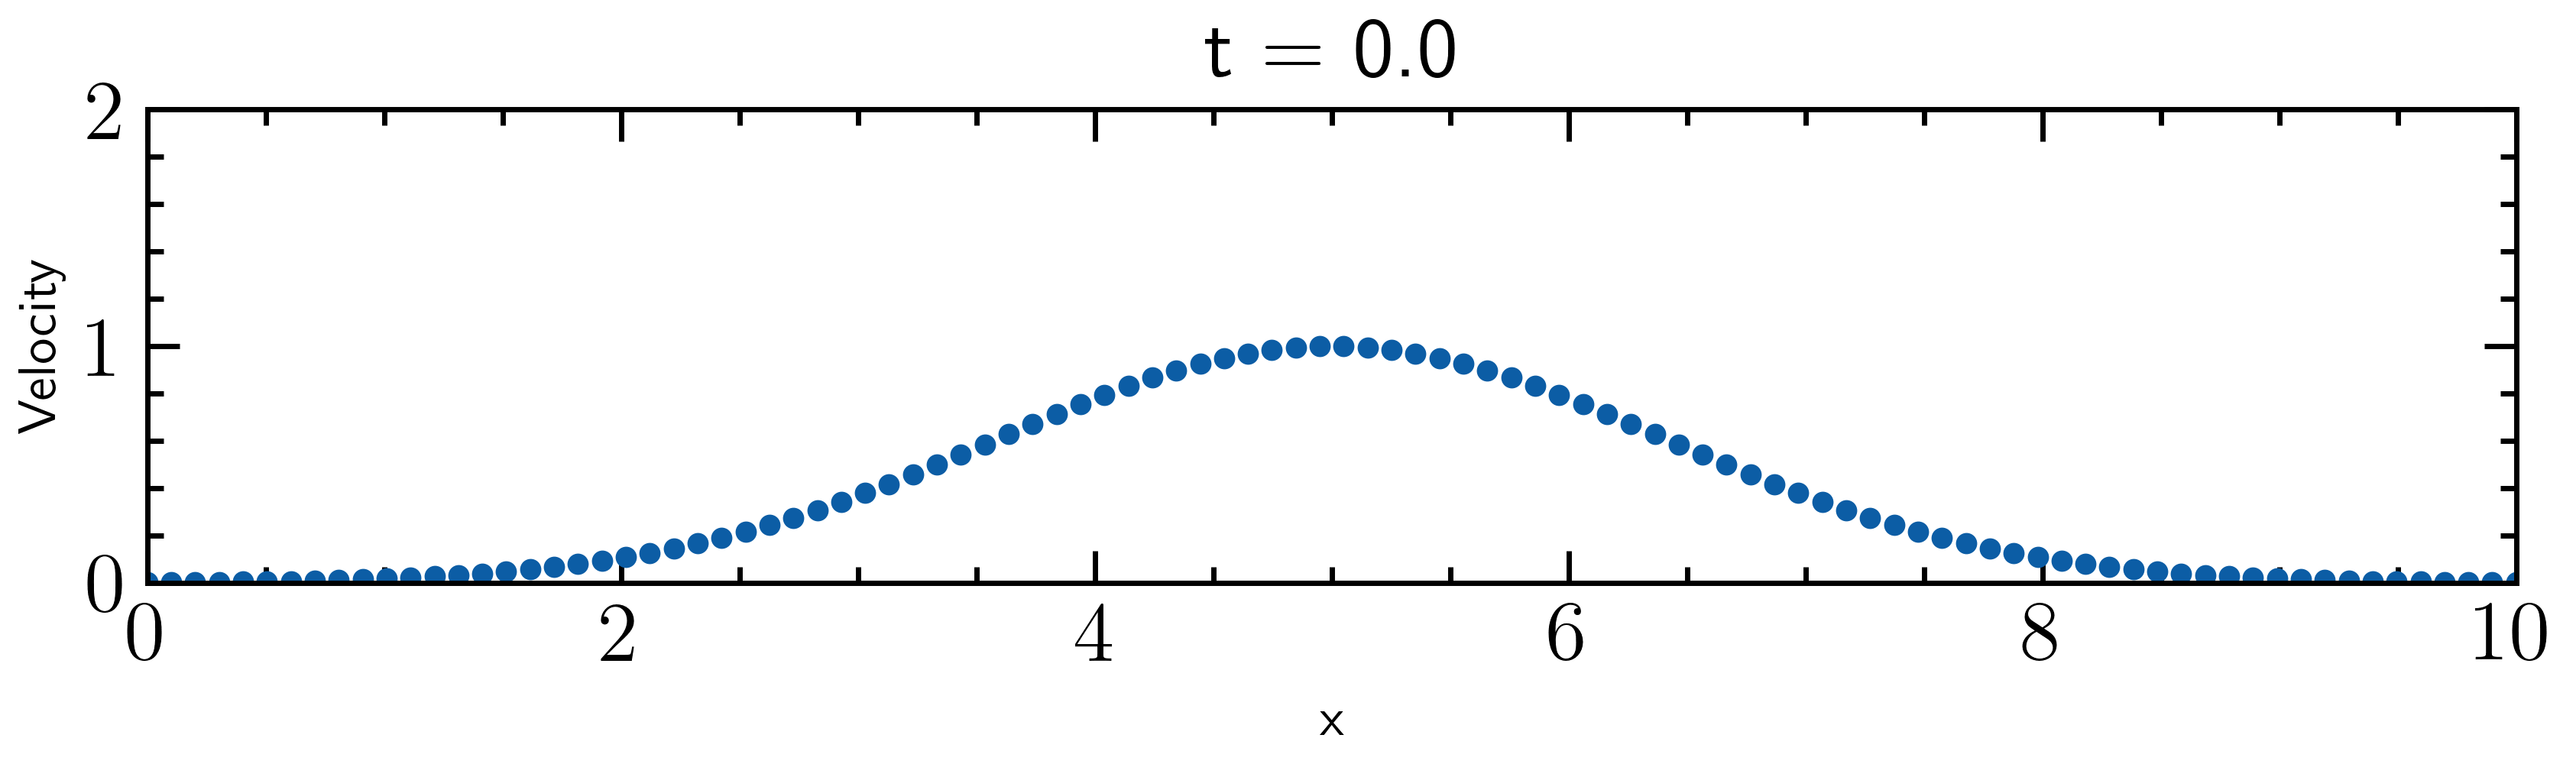

t = 1.0101010101010082


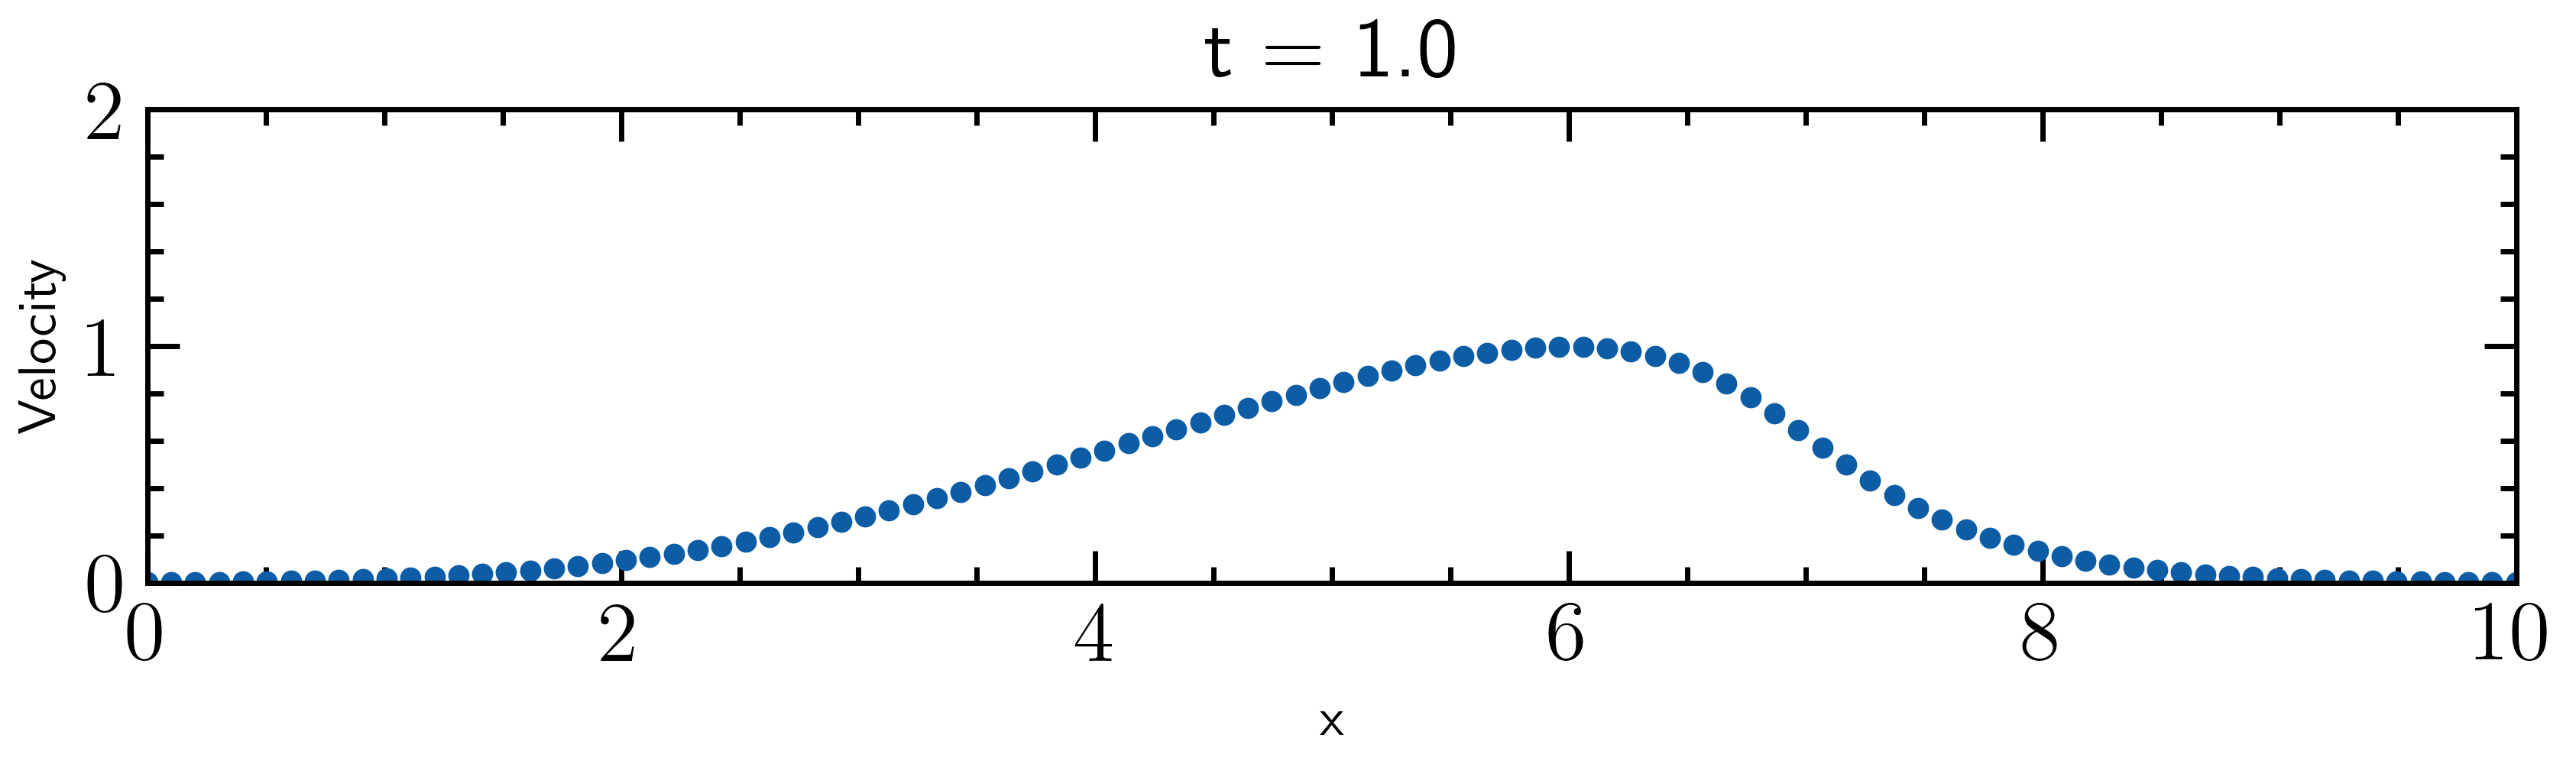

t = 2.0202020202020243


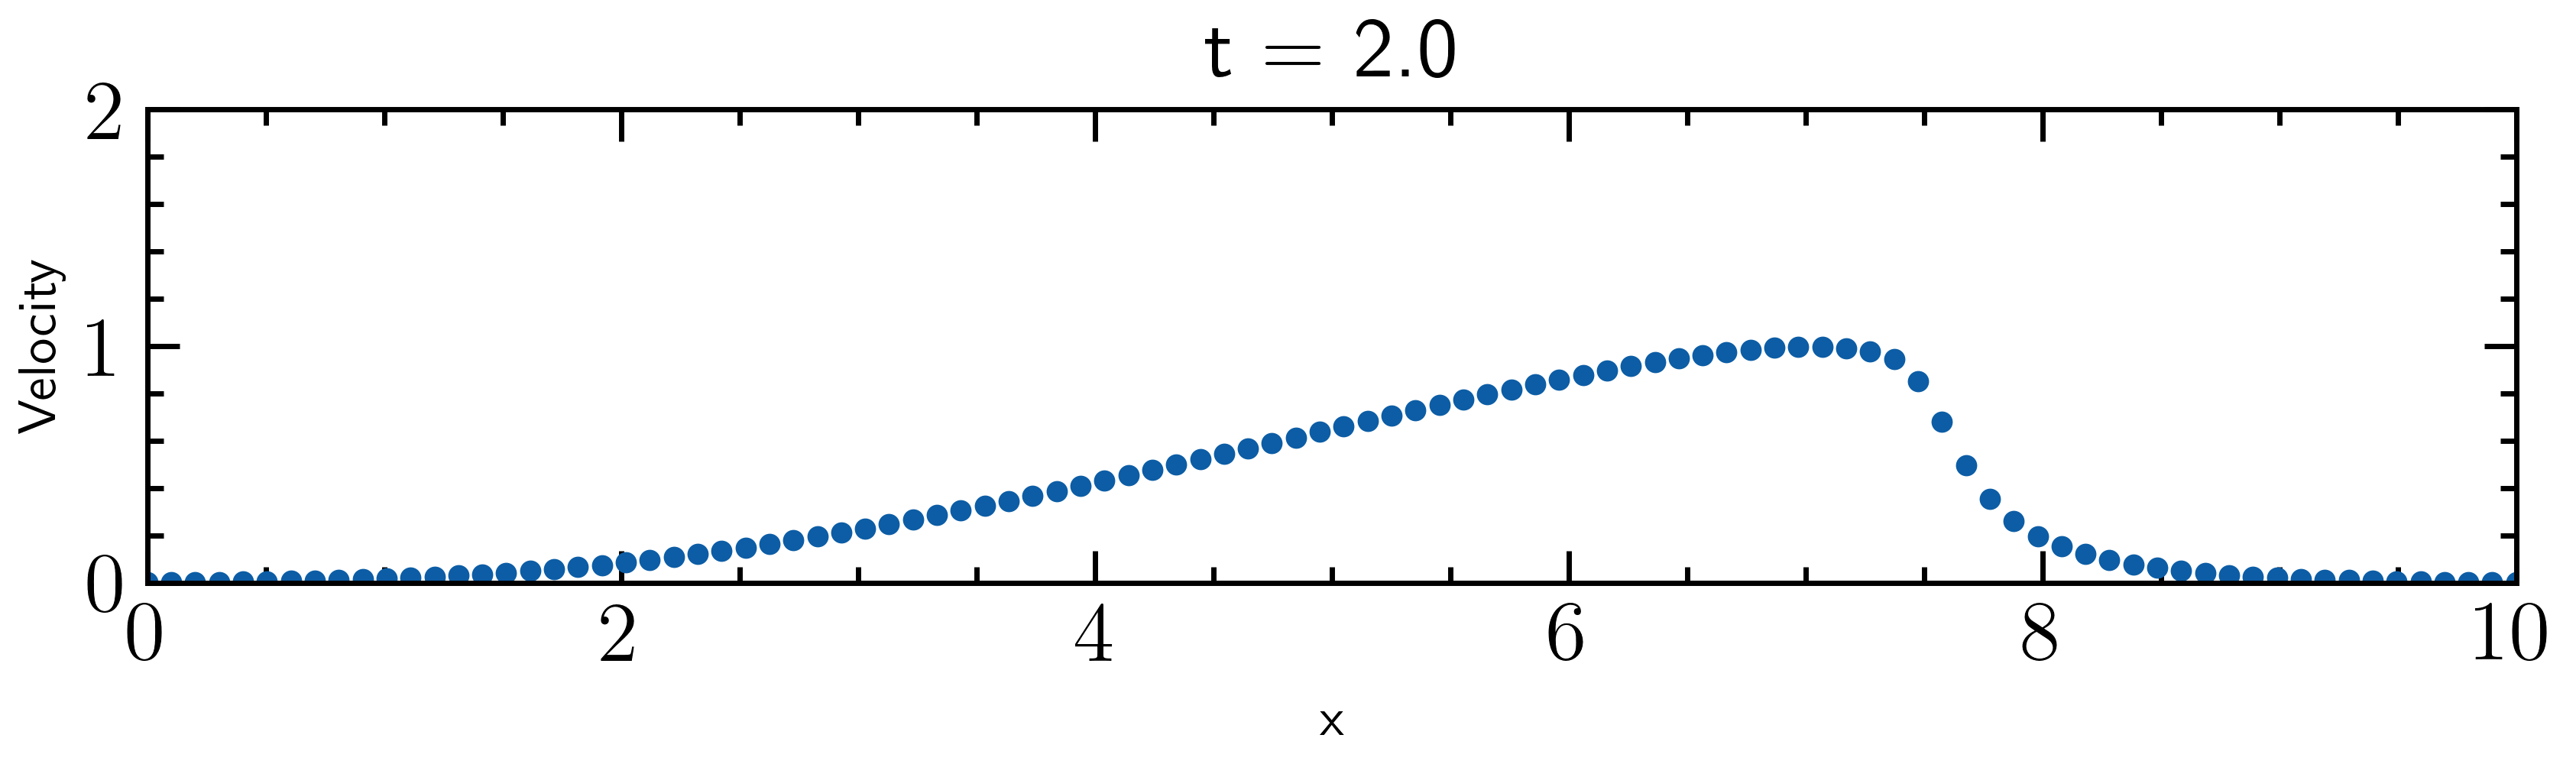

t = 4.040404040404015


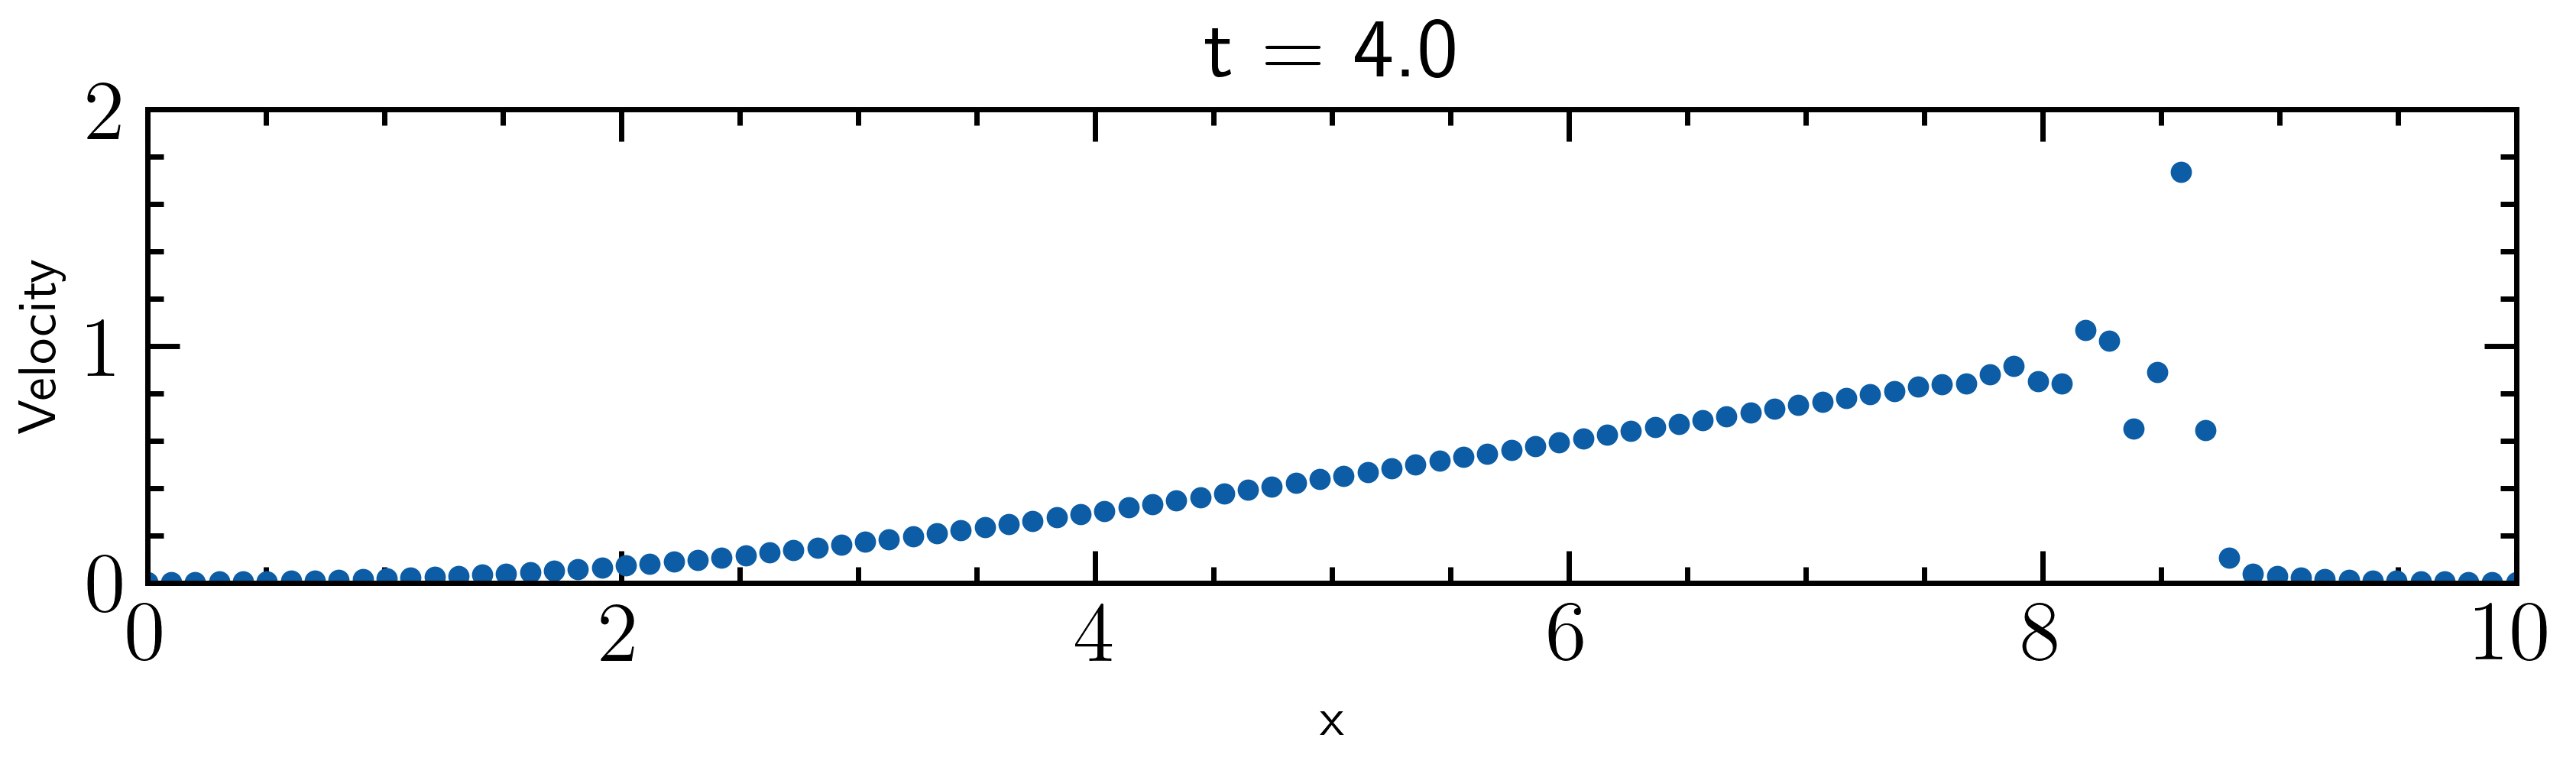

t = 7.575757575757651


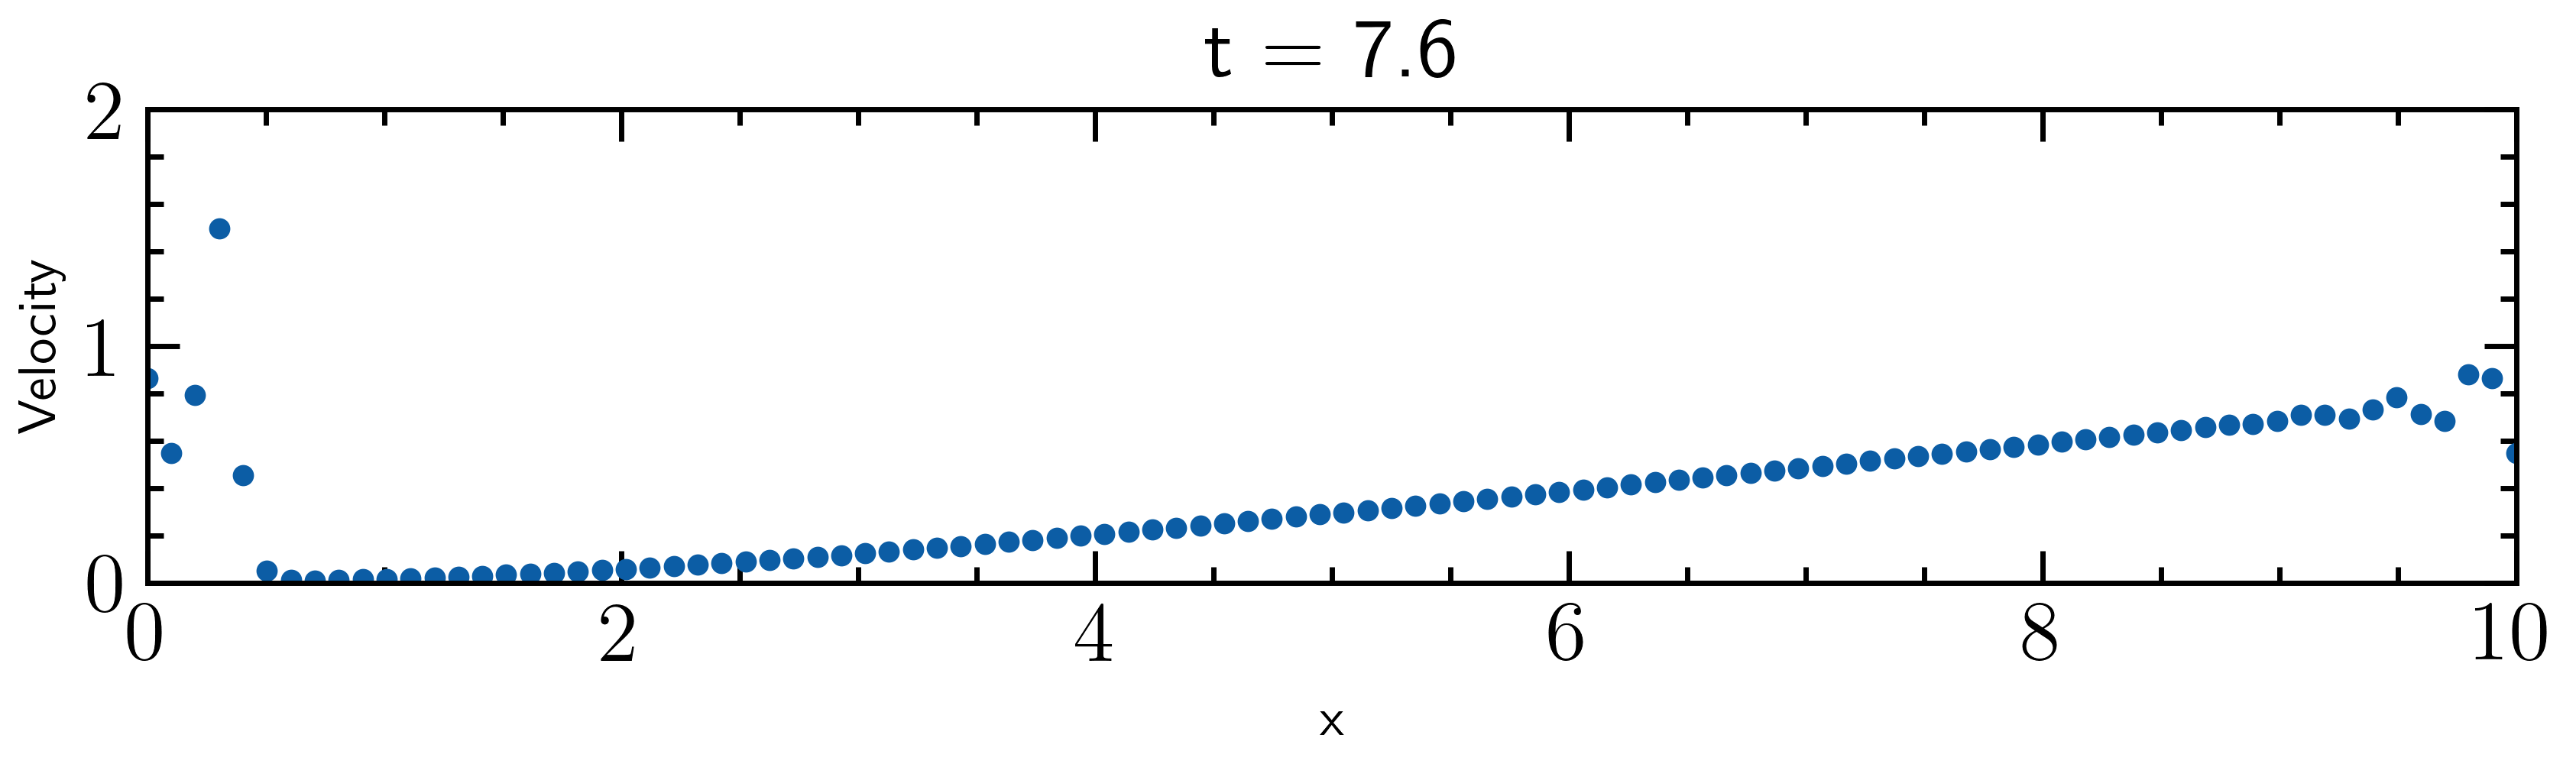

t = 10.101010101010248


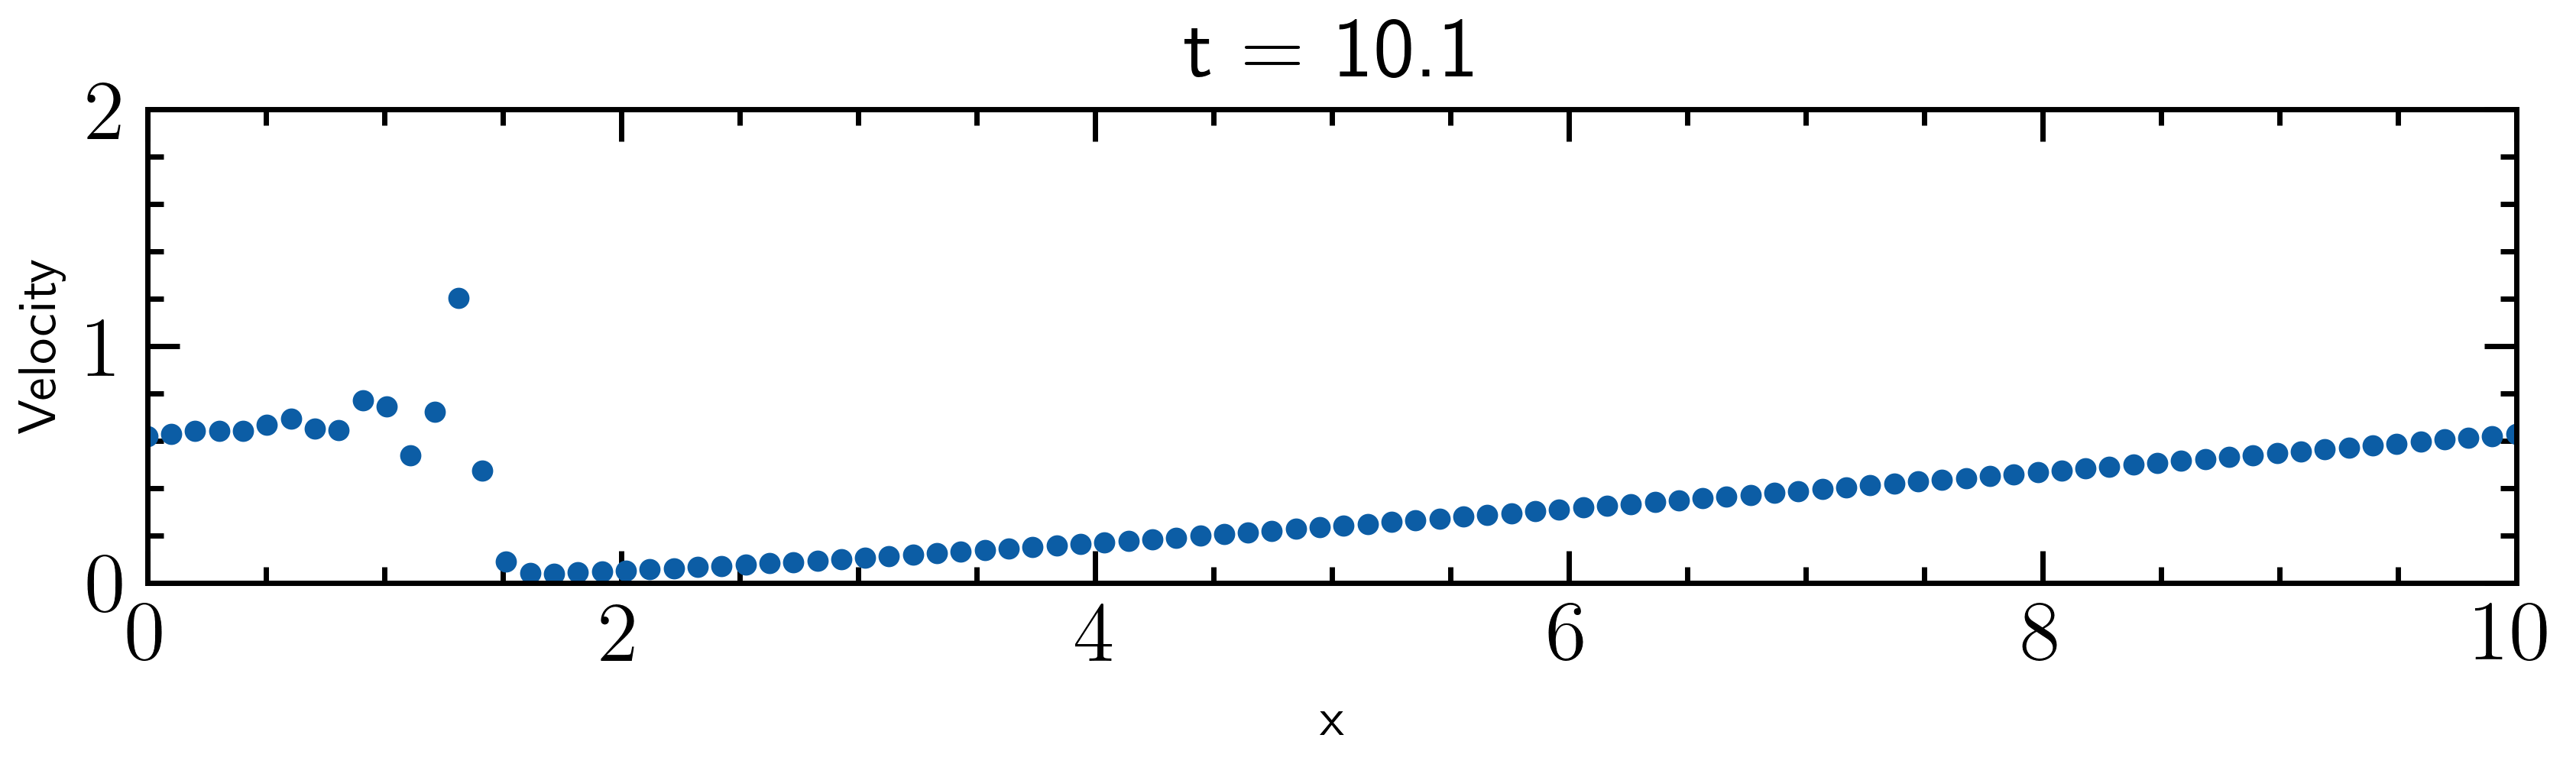

t = 20.202020202020634


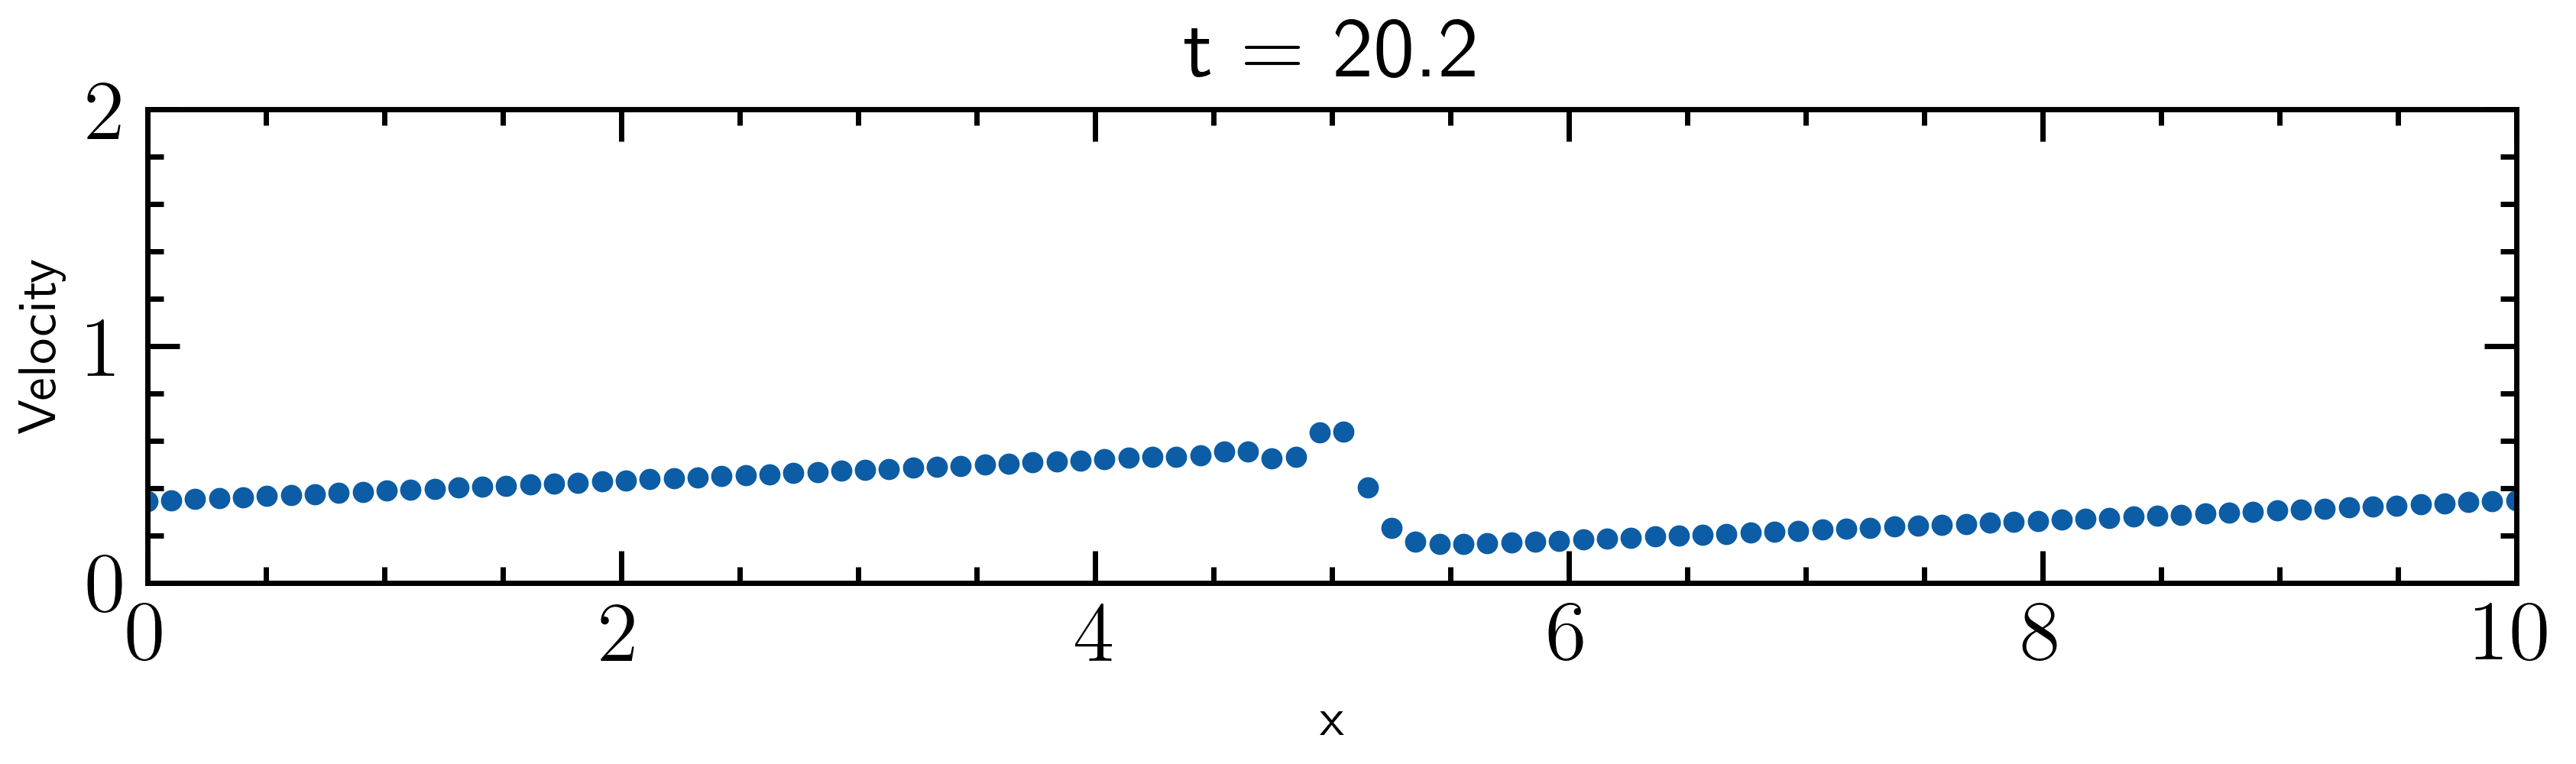

t = 30.303030303031022


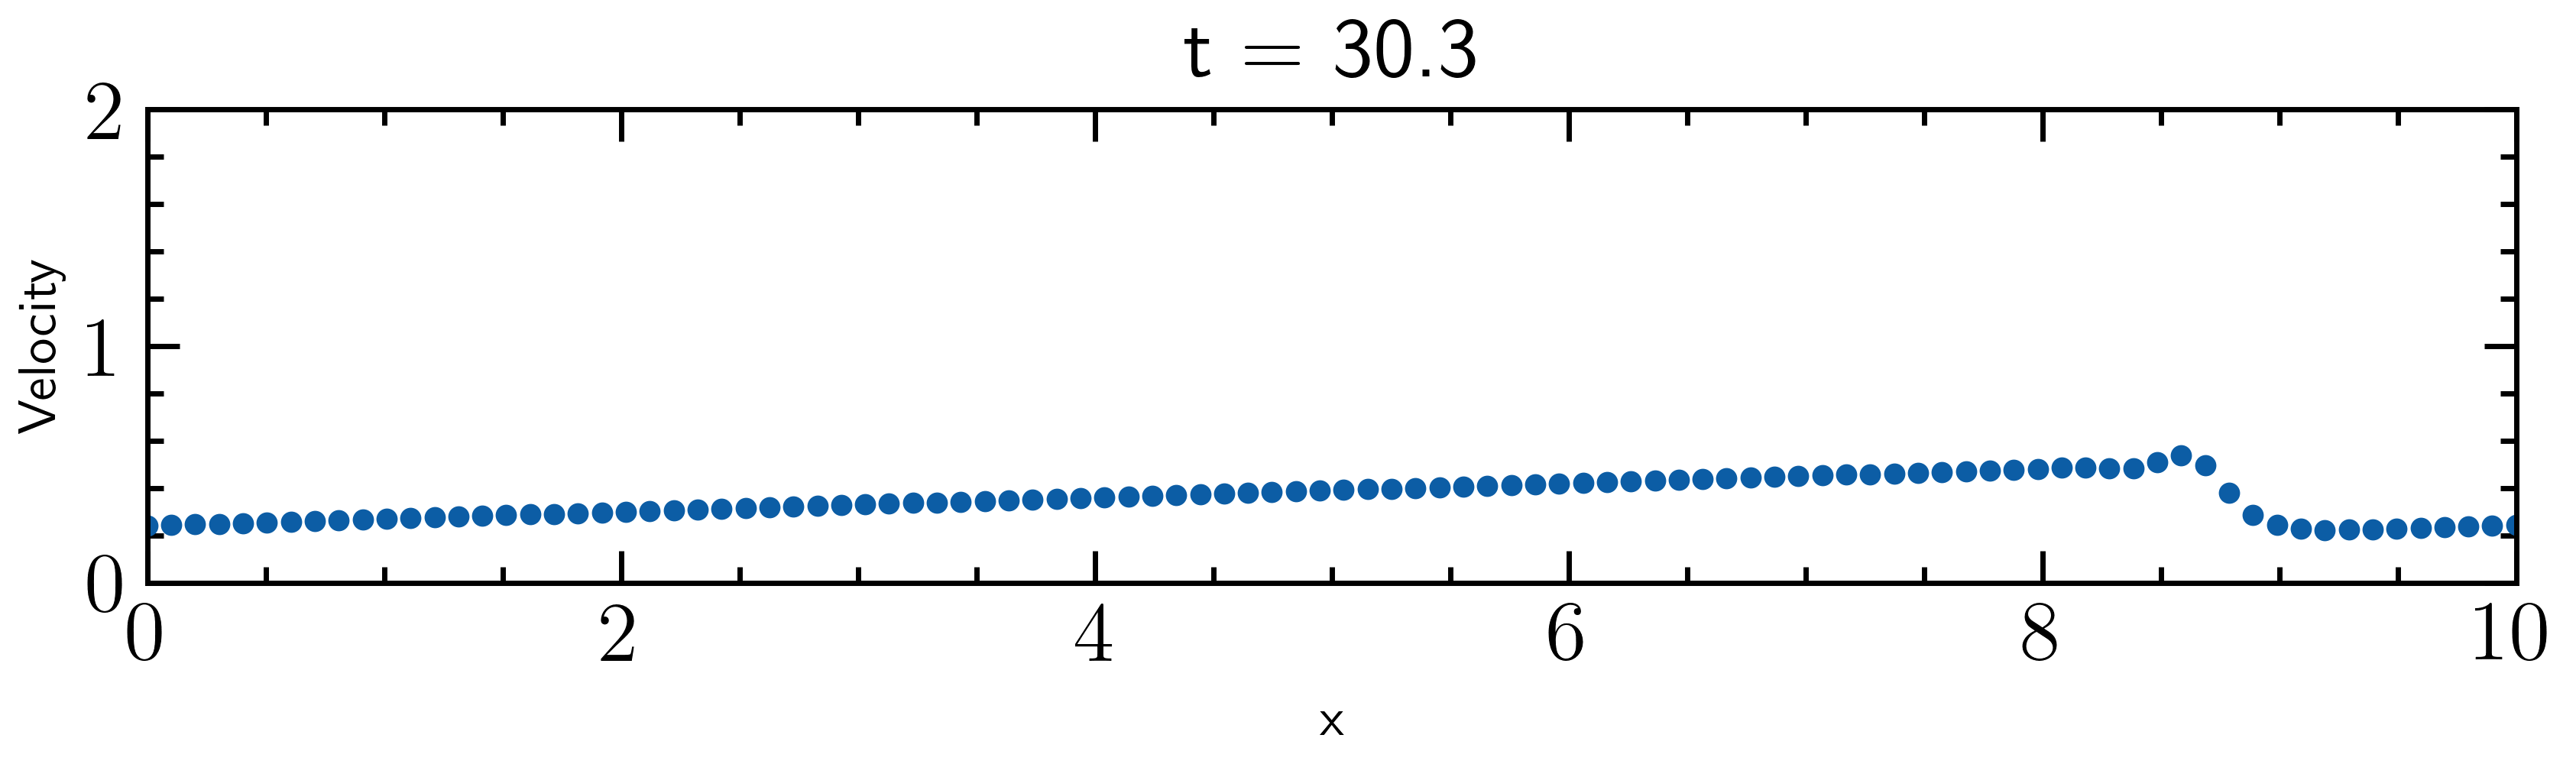

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams.update({"text.usetex" : True})

for n in [0, 100, 200, 400, 750, 1000, 2000, 3000]: 


    nx = 100 #x resolution
    
    
    x_min = 0.
    x_max = 10.
    
    v = np.zeros(nx)
    
    dv_dt = np.zeros(nx)
    
    sigma = 2.
    x_m = 5.
    eta = 0.01

    
    x = np.zeros(nx)
    
    t = 0.
    
    dx = ( x_max - x_min ) / ( nx - 1 )
        
    dt = dx * 0.1
    
    
    for i in range(0, nx):
        x[i] = i * dx
    
    
    for i in range(0, nx - 2):
        v[i] = np.exp( - ( ( x[i] - x_m ) / sigma )**2 )
    
    v[99] = v[1]
    v[98] = v[0]
    
    for k in range(0, n):
        
        for i in range (1, nx-1):

                          
            # first derivative of the velocity (central difference scheme)
            dx_v = ( v[i + 1] - v[i - 1] ) / ( 2 * dx )

            # second derivative of the velocity (central difference scheme)
            dxx_v = ( v[i + 1] - 2 * v[i] + v[i - 1] ) / dx**2

            # equation of momentum (Burgers' equation)       
            dv_dt[i]= - v[i] * dx_v + eta * dxx_v
        
           
        for i in range (1, nx-1):
            v[i] = v[i] + dv_dt[i] * dt
        
        # implement periodic boundary conditions
        v[nx - 1] = v[1]
        v[0] = v[nx - 2]   
        
        t = t + dt

    print(f"t = {t}")           
    
    #Here we plot the results
            
    fig = plt.figure(dpi = 500)
    ax1 = fig.add_subplot(1,1,1, aspect = 1,xlim=[x_min, x_max], ylim=[0 , 2])
    plt.plot(x, v, '.')
    plt.xlabel('x')
    plt.ylabel('Velocity')
    plt.title(f"t = {round(t,1)}")
    
    plt.show()
    
